***Use the Twitter Data and perform sentiment Analysis on that data using one of the Deep Learning classifier(Keras model) for text.***

Import pandas to load the Data Set

In [ ]:
#Import pandas to load the data set
import pandas as pd

Readin the twitter data using pandas

In [ ]:
#Reading the data from twitter using pandas
data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

Printing the Loaded Data

In [ ]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


***Pre-Processing of data***

Removing the twitter handles i.e., @user and numericals from the tweet column of the data

In [ ]:
#Removing twitter handles and numericals from the data
data['tweet'] = data.tweet.str.replace('@[A-Za-z0-9]+', '')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"#sikh #temple vandalised in in #calgary, #wso..."


Removing special characters and other symbols from the data(tweet column)

In [ ]:
#Removing special characters and other symbols from the tweets
data['tweet'] = data.tweet.str.encode("ascii", "ignore").str.decode("utf-8")
data

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate isz that youuu?
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"#sikh #temple vandalised in in #calgary, #wso..."


Remove Hashes(#) from the tweet column of the data

In [ ]:
#Removing hashes(#) from the tweet column of the data
data['tweet'] = data.tweet.str.replace('#', '')
data

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i can't use cause the...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide: society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu?
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"sikh temple vandalised in in calgary, wso con..."


Removing punctuations like ? from the tweet column of the data

In [ ]:
data['tweet'] = data.tweet.str.replace('[^\w\s]', '')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso cond...


Removing Stop Words

***Stop Words***:The words that are very common in any language common text and generally doesn't add any meaning to the text

In [ ]:
#importing popular package and creating an object for stopword
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
print(stopwords)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Creating Objects of SnowBallStemmer

Stemming:The process of reducing the word to the base word format

In [ ]:
#Creating an object for snowball stemmer
from nltk.stem import SnowballStemmer
stem = SnowballStemmer("english")

A function to tokenize words and remove stopwords and for performing the stemming

In [ ]:
#A function to tokenize words and remove stopwords and for performing the stemming
from nltk.tokenize import word_tokenize
def rem_stopwords_stem_token(t):
  Text = word_tokenize(t)
  l1 = []
  for a in Text:
    if a.isalpha():
      l1.append(a.lower())
  l2 = []
  for b in l1:
    if b not in stopwords:
      l2.append(b)
  l3 = []
  
  for c in l2:
    p = stem.stem(c)
    l3.append(p)
  

  return " ".join(l3)

Calling the function to apply functionalities to the tweet column of the data

In [ ]:
#Applying the function to tweet column of the data
data['tweet'] = data['tweet'].apply(rem_stopwords_stem_token)
data

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct run
1,2,0,thank lyft credit cant use caus dont offer whe...
2,3,0,bihday majesti
3,4,0,model love u take u time ur
4,5,0,factsguid societi motiv
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listen sad song monday morn otw work sad
31960,31961,1,sikh templ vandalis calgari wso condemn act


**POS Tagging:** Marking the words with partcupar parts of speech like noun, pronoun, adjective based on its meaning and context

In [ ]:
#POS Tagging
tweet = data.tweet
t = pd.Series(tweet.head(100)).to_string()
word = word_tokenize(t)
for w in word:
  tagged_words = nltk.pos_tag(word)
tagged_words

[('0', 'CD'),
 ('father', 'NN'),
 ('dysfunct', 'JJ'),
 ('selfish', 'JJ'),
 ('drag', 'NN'),
 ('kid', 'NN'),
 ('dysfunct', 'JJ'),
 ('run', 'NN'),
 ('1', 'CD'),
 ('thank', 'NN'),
 ('lyft', 'NN'),
 ('credit', 'NN'),
 ('cant', 'NN'),
 ('use', 'NN'),
 ('caus', 'NN'),
 ('dont', 'NN'),
 ('offer', 'NN'),
 ('whe', 'NN'),
 ('...', ':'),
 ('2', 'CD'),
 ('bihday', 'JJ'),
 ('majesti', 'VBD'),
 ('3', 'CD'),
 ('model', 'NN'),
 ('love', 'NN'),
 ('u', 'JJ'),
 ('take', 'VB'),
 ('u', 'JJ'),
 ('time', 'NN'),
 ('ur', 'JJ'),
 ('4', 'CD'),
 ('factsguid', 'NN'),
 ('societi', 'NN'),
 ('motiv', 'VBZ'),
 ('5', 'CD'),
 ('huge', 'JJ'),
 ('fan', 'NN'),
 ('fare', 'NN'),
 ('big', 'JJ'),
 ('talk', 'NN'),
 ('leav', 'VBZ'),
 ('chao', 'JJ'),
 ('pay', 'NN'),
 ('disput', 'NN'),
 ('ge', 'NN'),
 ('...', ':'),
 ('6', 'CD'),
 ('camp', 'NN'),
 ('tomorrow', 'NN'),
 ('danni', 'VBZ'),
 ('7', 'CD'),
 ('next', 'JJ'),
 ('school', 'NN'),
 ('year', 'NN'),
 ('year', 'NN'),
 ('exam', 'VBP'),
 ('cant', 'NN'),
 ('think', 'VBP'),
 ('school',

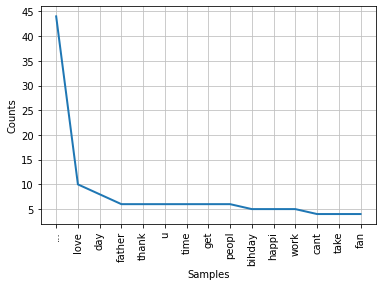

In [ ]:
from nltk.probability import FreqDist
Frequency = FreqDist(word)
Frequency.plot(15)




**Tfidf Vectorizer**:It learns the vocabulary(words),tokenize the words and highlights words that are more interesting i.e.,words with high frequency

In [ ]:
#Applying TFID vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(max_features=15000,ngram_range=(1,2))
col = data['tweet']
f =v.fit_transform(col)
print(f)

  (0, 11404)	0.2394347019202803
  (0, 7236)	0.22644685129830222
  (0, 3443)	0.3248626624224705
  (0, 11786)	0.3415693515104111
  (0, 3545)	0.7968741209833876
  (0, 4166)	0.18487593416376708
  (1, 1887)	0.38500181384531706
  (1, 13989)	0.3664671246220172
  (1, 14563)	0.3938015254186717
  (1, 9732)	0.2958087235829827
  (1, 3359)	0.18984645567055156
  (1, 1886)	0.2680656641606504
  (1, 13959)	0.22050552444915197
  (1, 1763)	0.1848120334728906
  (1, 2615)	0.33448792573056635
  (1, 8313)	0.37781192597294627
  (1, 13012)	0.17201724509116728
  (2, 1186)	0.6740696760580689
  (2, 8369)	0.6509703021799566
  (2, 1151)	0.34909559936886364
  (3, 13379)	0.3649078807257563
  (3, 12879)	0.36254622523531566
  (3, 8220)	0.3649078807257563
  (3, 8869)	0.3649078807257563
  (3, 13920)	0.3450199967770635
  :	:
  (31959, 11455)	0.40714170058452154
  (31959, 9984)	0.4148897439207149
  (31959, 8906)	0.38991081859678856
  (31959, 7857)	0.264043130808687
  (31959, 12352)	0.27358707167622565
  (31959, 14776)	0.20

In [ ]:
label = data.iloc[:, 1].values
tweet = data.iloc[:, 2].values

Splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(tweet, label, test_size=0.2, random_state=0)

In [ ]:
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence


token = Tokenizer()


token.fit_on_texts(a_train)

a_train = token.texts_to_sequences(a_train)
a_test = token.texts_to_sequences(a_test)

size = len(token.word_index)+1

Building the model by using all the necessary layers. Used **Sequential()** model which is appropirate for this problem

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D,Conv1D
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
embedding_dim = 100

keras_model = Sequential()
keras_model.add(Embedding(size,embedding_dim))
keras_model.add(Conv1D(128, 5,activation = 'relu'))
keras_model.add(layers.GlobalMaxPooling1D())
keras_model.add(layers.Dense(32, activation = 'relu'))
keras_model.add(Dropout(0.2))
keras_model.add(layers.Dense(1, activation = 'sigmoid'))



Compiled the model and shown the model summary

In [ ]:
keras_model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2805000   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

Fitting the model and used Epochs which specifies number of passes of entire training data set the algorithm has completed

In [ ]:
from keras.preprocessing.sequence import pad_sequences


a_train = pad_sequences(a_train,padding = 'post')
a_test = pad_sequences(a_test,padding = 'post')
keras_model.fit(a_train, b_train, validation_data=(a_test, b_test), epochs=5, batch_size=64,verbose=True)

Epoch 1/5
400/400 [==============================] - 19s 46ms/step - loss: 0.1928 - accuracy: 0.9416 - val_loss: 0.1108 - val_accuracy: 0.9642
Epoch 2/5
400/400 [==============================] - 20s 51ms/step - loss: 0.0639 - accuracy: 0.9791 - val_loss: 0.1201 - val_accuracy: 0.9618
Epoch 3/5
400/400 [==============================] - 18s 45ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.1545 - val_accuracy: 0.9615
Epoch 4/5
400/400 [==============================] - 18s 45ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.2149 - val_accuracy: 0.9621
Epoch 5/5
400/400 [==============================] - 18s 46ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.2188 - val_accuracy: 0.9632


Specifying the accuracy of the model

In [ ]:
Acc = keras_model.evaluate(a_test, b_test, verbose=0)
print("Accuracy: %.2f%%"%(Acc[1]*100))

Accuracy: 96.32%
